# Урок 7

## Линейная регрессия. 

В общем виде __модель регрессии__ — это любая модель зависимости (__объясняемой__) количественной переменной $y$ от другой или нескольких других переменных (__факторов__) $x_i$. Такую модель можно записать в виде:
$$y = f_b(x_1, \dots, x_m) + \varepsilon,$$
где $f_b(x)$ — некоторая функция, имеющая набор параметров $b$, а $\varepsilon$ — случайная ошибка. При этом на ошибку накладывается условие, что её математическое ожидание равно $0$:
$$M(\varepsilon) = 0$$

Модель регрессии называется __линейной__, если функция $f_b(x)$ является линейной, т.е. модель имеет вид:
$$y = b_0 + b_1 x_1 + \dots + b_m x_m + \varepsilon$$

__В чём здесь суть__. Участвующие в этой модели переменные удобно воспринимать как некоторые случайные величины. В этом случае можно всегда подобрать параметры $b$ так, чтобы такое равенство выполнялось прямо на уровне случайных величин.

Важным частным случаем линейной регрессии является __парная регрессия__. При парной регрессии используется только один фактор, т.е. модель имеет вид:
$$y = b_0 + b_1 x + \varepsilon$$

На практике такая модель имеет вид:
$$Y = b_0 + b_1 X + E,$$
где $X$ — значения фактора $x$, $Y$ — значения переменной $y$, $E$ — значения ошибок модели на каждом объекте (т.е. реализации случайной величины $\varepsilon$). В этом случае условие $M(\varepsilon) = 0$ трансформируется в условие $\overline{E} = 0$, где $\overline{E}$ — выборочное среднее ошибок.

__Коэффициенты парной регрессии__ можно найти по формуле:
$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \: b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$


__Пример 1__

Рассмотрим данные со значениями площадей квартир в квадратных метрах (массив `x1`) и соответствующими им ценами на квартиры в тысячах долларов (массив `y1`), приведеннные для $12$ наблюдений. По этим данным построим модель линейной регрессии.

In [5]:
import numpy as np

In [17]:
x1 = np.array([80, 90, 85, 115, 85, 85, 90, 80, 105, 110, 65, 100])
y1 = np.array([150, 160, 155, 175, 140, 150, 140, 155, 165, 190, 140, 165])

Найдём коэффициенты линейной регрессии:

In [18]:
b1 = (np.mean(x1 * y1) - np.mean(x1) * np.mean(y1)) / (np.mean(x1 ** 2) - np.mean(x1) ** 2)
b0 = np.mean(y1) - b1 * np.mean(x1)

b0, b1

(77.89962825278835, 0.8717472118959082)

_Замечание_. В данной формуле не нужно обязательно использовать смещённую или несмещённую оценку, но важно, конечно, использовать один и тот же тип оценки и для ковариации, и для дисперсии.

Итак, модель линейной регрессии имеет вид:
$$y = 77.9 + 0.87 \cdot x,$$
т.е. с увеличением площади квартиры на $1$ квадратный метр цена возрастет на $0.87$ тысячи долларов. Визуализируем полученные результаты на графике.

In [48]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

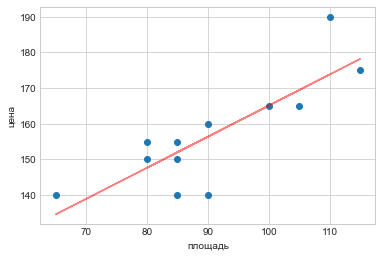

In [7]:
ox = x1
oy = b0 + b1 * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('площадь')
plt.ylabel('цена');

__Метод наименьших квадратов__

В общем случае, когда факторов больше одного, коэффициенты можно подобрать с помощью __метода наименьших квадратов__. Здесь $X$ — это уже не просто выборка, а матрица объект-признак, т.е. элемент $x_{ij}$ из этой матрицы является $j$-м признаком $i$-го объекта.

Для удобства записи метода наименьших квадратов в первую очередь введём дополнительный «фактор» $x_0 = 1$. Это делается для того, чтобы модель можно было записать в матричном виде:
$$Y = X \cdot b + E,$$
где $X$ — такая расширенная матрица объект-признак (первый столбец которой полностью состоит из единиц), $b = (b_0, b_1, \dots, b_m)$ — вектор коэффициентов модели, операция «$\cdot$» — матричное умножение.

__Метод наименьших квадратов__ заключается в минимизации расстояния между векторами $Y$ и $X \cdot b$:
$$\| Y - X \cdot b \| \rightarrow \min_b$$
При этом вводится дополнительное условие на среднюю ошибку:
$$\overline{E} = 0,$$
где $E = Y - X \cdot b$. Решение такой оптимизационной задачи даёт __коэффициенты линейной регрессии__:
$$b = (X^\top X)^{-1} X^\top Y$$

_Замечание_. У метода наименьших квадратов есть один изъян: в случае, когда в матрице $X$ представлены линейно зависимые (или близкие к этому) признаки, вычисление обратной матрицы $(X^\top X)^{-1}$ становится проблематичным. В таких ситуациях стоит сперва избавиться от линейно зависимых признаков (это задача _факторного анализа_, который мы рассмотрим на занятии 8).

__Пример 2__

Рассмотрим данные о хоккеистах и попробуем построить модель регрессии, которая будет предсказывать возраст хоккеиста по его росту и весу.

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('hockey_players.csv',  encoding='cp1251', parse_dates=['birth'])
df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


In [7]:
x2 = df[['height', 'weight']].values

y2 = df['age'].values
y2

array([24.95277207, 21.11978097, 25.229295  , ..., 26.82546201,
       26.01232033, 20.39698836])

К матрице $X$ (массив `x2`) нужно также добавить столбец из $1$, соответствующий фиктивному фактору.

In [31]:
x2.shape, y2.shape

((6292, 3), (6292,))

In [11]:
ones = np.ones((x2.shape[0], 1))
x2 = np.hstack((ones, x2))

In [12]:
x2.shape

(6292, 3)

In [13]:
x2

array([[  1., 185.,  84.],
       [  1., 188.,  86.],
       [  1., 182.,  95.],
       ...,
       [  1., 191.,  88.],
       [  1., 188.,  89.],
       [  1., 193.,  95.]])

Запишем матрицу $X^\top X$ и посчитаем её определитель.

In [14]:
XTX = x2.T.dot(x2)

np.linalg.det(XTX)

181879883283410.0

Определитель не близок к нулю, поэтому проблем с методом нет. Коэффициенты модели:

In [15]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x2.T).dot(y2)

print(b)

[49.70252952 -0.190563    0.1438651 ]


Итак, наша модель регрессии имеет вид:
$$y = 49.702 - 0.19 \cdot x_1 + 0.144 \cdot x_2,$$
где $x_1$ — рост хоккеиста, $x_2$ — вес хоккеиста.



In [52]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression().fit(x2, y2)
print(type(model2))
model2.intercept_, model2.coef_

<class 'sklearn.linear_model.base.LinearRegression'>


(49.702529523972004, array([ 0.       , -0.190563 ,  0.1438651]))

__Коэффициент детерминации__

Рассмотрим случайную ошибку
$$\varepsilon = y - x \cdot b$$

Коэффициенты модели линейной регрессии подбираются так, чтобы математическое ожидание ошибки было равно нулю:
$$M(\varepsilon) = 0$$

Теперь качество модели определяет дисперсия ошибки $D(\varepsilon)$. Если и математическое ожидание, и дисперсия ошибки близки к нулю, это свидетельствует о высоком качестве модели, т.е. в этом случае модель хорошо соответствует имеющимся данным. Эта интуиция приводит нас к __коэффициенту детерминации__:
$$R^2 = 1 - \dfrac{D(\varepsilon)}{D(y)}$$

Коэффициент детерминации принимает значения из интервала $[0, 1]$. Близкие к $1$ значения коэффициента детерминации свидетельствуют о высоком качестве модели.

Чтобы посчитать коэффициент детерминации, построим «предсказанные» моделью значения
$$Z = X \cdot b$$

Пусть $SS_Y = \displaystyle\sum_{i = 1}^n (y_i - \overline{Y})^2$ — сумма квадратов отклонений значений массива $Y$ от среднего, а $SS_{res}$ — _остаточная сумма квадратов отклонений_ $SS_{res} = \displaystyle\sum_{i = 1}^n (y_i - {Z})^2$

__Коэффициент детерминации__:
$$R^2 = 1 - \dfrac{SS_{res}}{SS_{y}}$$

__Пример 3__

Посчитаем коэффициент детерминации для модели из предыдущих примеров. Для примера 1:

In [19]:
z1 = b0 + b1 * x1
# e1 = y1 - z1 

In [21]:
def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()

In [24]:
R1 = 1 - ((y1 - z1)**2).sum() / sum_of_squares(y1)
R1

0.6752261641274688

Коэффициент детерминации, равный $0.6752$, означает, что $67 \%$ дисперсии переменной $y$ _учитывается_ или _объясняется_ моделью. Оставшиеся $33 \%$ обусловлены какими-то ещё факторами, которые при построении модели не учитывались.

Также посчитаем коэффициент деретминации для примера 2:

In [25]:
z2 = x2.dot(b)
# e2 = y2 - z2

In [27]:
R2 = 1 - ((y2 - z2)**2).sum() / sum_of_squares(y2)
R2

0.034533842266700754

Как мы видим, коэффициент детерминации для второй модели оказался очень низок. Признаки, которые мы выбрали, объясняют лишь малый процент дисперсии переменной $y$:

Несмотря на то, что теоретически коэффициент детерминации принимает значения от $0$ до $1$, значение коэффициента детерминации ниже $1$ не означает, что модель построена плохо (и могла бы быть лучше). 

Рассмотрим модель, построенную с помощью метода наименьших квадратов. (Напомним, что такая модель является наилучшей моделью линейной регрессии, которую можно построить на имеющихся данных.) Пусть $r_{YZ}$ — коэффициент корреляции Пирсона между массивами $Y$ и $Z$. Оказывается, в таком случае справедливо равенство:
$$R^2 = r_{YZ}^2$$

Таким образом, коэффициент детерминации прямо зависит от уровня корреляции в данных и не может достигнуть $1$, если в данных нет линейной зависимости.

__Пример 4__

Сгенерируем два набора данных: в одном корреляция между признаками высокая, в другом — низкая. Построим для каждого набора модель линейной регрессии и посчитаем коэффициент детерминации.

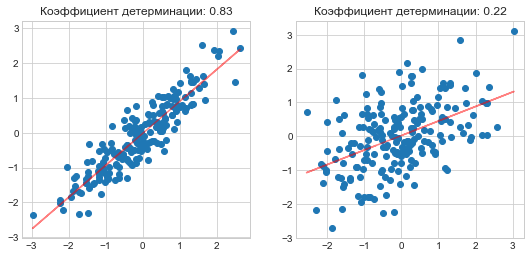

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.set_size_inches(9, 4)

x, y = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.9], [0.9, 1]], size=200).T
b1_ = np.cov(x, y)[0, 1] / np.var(x)
b0_ = y.mean() - b1_ * x.mean()

ax1.scatter(x, y)
ax1.plot(x, b0_ + b1_ * x, color='red', alpha=0.5)
ax1.set_title(f'Коэффициент детерминации: {round(np.corrcoef(x, y)[0, 1] ** 2, 2)}')

x, y = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.4], [0.4, 1]], size=200).T
b1_ = np.cov(x, y)[0, 1] / np.var(x)
b0_ = y.mean() - b1_ * x.mean()

ax2.scatter(x, y)
ax2.plot(x, b0_ + b1_ * x, color='red', alpha=0.5)
ax2.set_title(f'Коэффициент детерминации: {round(np.corrcoef(x, y)[0, 1] ** 2, 2)}')

plt.show()

Как мы видим, хорошее качество первой модели и низкое качество второй обусловлены не качеством проделанной работы, а наличием зависимости в данных.

### Статистический анализ уравнения регрессии

Итак, ранее мы установили, что верхняя граница коэффициента детерминации для модели линейной регрессии, построенной по имеющимся данным, не всегда равна $1$. Так как же тогда определить, какой коэффициент детерминации означает значимый уровень соответствия модели данным, а какой — нет?

Для таких целей существует т.н. __F-тест Фишера__. Формально при таком тесте проверяется нулевая гипотеза о том, что теоретический коэффициент детерминации (т.е. для модели, построенной для случайных величин) равен $0$, т.е. что в имеющихся данных вообще нет никакой зависимости. 

При F-тесте используется статистика:
$$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)},$$
где $R^2$ — коэффициент детерминации, $n$ — число наблюдений, $m$ — число факторов. Такая статистика в предположении верности нулевой гипотезы имеет __F-распределение Фишера__ с параметрами $k_1 = m$, $k_2 = n - m - 1$.

Распределение Фишера имеет один хвост, поэтому рассматривается правосторонняя критическая область $\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right)$, где $t_{\beta, \: k_1, k_2}$ — квантиль порядка $\beta$ для распределения Фишера с параметрами $k_1$, $k_2$.

Если статистика попадает в критическую область, то гипотеза о равенстве нулю коэффициента детерминации отвергается. Это означает, что построенная нами модель значимо соответствует данным.

__Пример 5__

Проверим значимость уравнений регрессии, построенных в первом и втором примерах. В первом примере:

In [29]:
n = x1.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 10)

Возьмём уровень значимости $\alpha = 0.05$. Нужный нам квантиль можно посчитать с помощью функции `scipy.stats.f.ppf`:

In [45]:
from scipy import stats

In [31]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.9646027437307145

Итак, критическая область:
$$\Omega_\alpha = \left( 4.96, \infty \right)$$

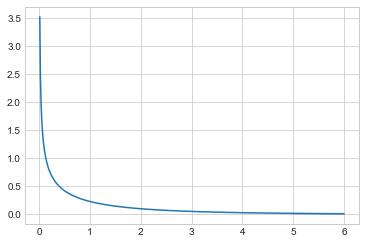

In [39]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

# plt.ylim(0, 0.5)

Считаем значение статистики:

In [40]:
F = (R1 / k1) / ((1 - R1) / k2)
F

20.79065766838693

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

Теперь то же самое для второго примера.

In [42]:
n = x2.shape[0]
m = x2.shape[1] - 1  # поскольку добавляли фиктивный столбец

k1 = m
k2 = n - m - 1

k1, k2

(2, 6289)

Критическая область:

In [46]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

2.9971597282399225

Статистика:

In [43]:
F = (R2 / k1) / ((1 - R2) / k2)
F

112.47589171078735

In [50]:
import statsmodels.api as sm
model = sm.OLS(y2, x2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     112.5
Date:                Sat, 21 Aug 2021   Prob (F-statistic):           1.01e-48
Time:                        09:56:48   Log-Likelihood:                -17960.
No. Observations:                6292   AIC:                         3.593e+04
Df Residuals:                    6289   BIC:                         3.595e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7025      1.985     25.045      0.0

Второе уравнение регрессии также признаётся значимым.

__Доверительные интервалы для коэффициентов парной регрессии__

В случае парной регрессии можно построить доверительные интервалы для коэффициентов регрессии.

__Смысл__ доверительных интервалов тут в том, что, как мы уже отмечали ранее, модель линейной регрессии можно построить прямо по случайным величинам. Это значит, что, построив модель по имеющимся данным, можно построить доверительные интервалы и посмотреть, насколько далеко могут быть реальные значения коэффициентов регрессии от построенных нами.

Начнём с коэффициента наклона $b_1$. Допустим, мы получили коэффициент наклона $\hat{b}_1$, и пусть $b_1$ — реальное значение этого коэффициента. Рассмотрим статистику
$$t = \dfrac{\hat{b}_1 - b_1}{S_{slope}},$$
где $S_{slope}$ — __стандартная ошибка коэффициента наклона__:
$$S_{slope} = \sqrt{\dfrac{\frac{1}{n - 2} \displaystyle\sum_{i=1}^{n}e_i^2}{\displaystyle\sum_{i=1}^n (x_i - \overline{X})^2}}$$
Здесь $e_i$ — значение ошибки на $i$-м объекте, т.е. $e_i = y_i - z_i$.

Статистика $t$ имеет распределение Стьюдента с параметром $df = n - 2$. Отсюда можно, имея доверительную вероятность $p$, построить __доверительный интервал для коэффициента наклона__ по формуле:
$$P \left( \hat{b}_1 + t_{\alpha/2, \: n - 2} \cdot S_{slope} \leq b_1 \leq \hat{b}_1 + t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \right) = p,$$
где $\alpha = 1 - p$, $t_{\beta, n - 2}$ — квантиль порядка $\beta$ для распределения Стьюдента.

Аналогично можно построить доверительный интервал для коэффициента сдвига $b_0$. __Стандартная ошибка коэффициента сдвига__ вычисляется по формуле:
$$S_{intercept} = S_{slope} \cdot \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^n x_i^2}$$

Статистика
$$t = \dfrac{\hat{b}_0 - b_0}{S_{intercept}}$$
также имеет распределение Стьюдента с параметром $df = n - 2$. Итак, __доверительный интервал для коэффициента наклона__:
$$P \left( \hat{b}_0 + t_{\alpha/2, \: n - 2} \cdot S_{intercept} \leq b_0 \leq \hat{b}_0 + t_{1 - \alpha/2, \: n - 2} \cdot S_{intercept} \right) = p$$

__Пример 6__

В примере 1 мы получили модель парной регрессии с коэффициентами:

In [45]:
b0, b1

(77.8996282527881, 0.8717472118959109)

Построим для коэффициента наклона доверительный интервал.

In [46]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [47]:
s_slope = standard_error_slope(x1, y1, z1)
s_slope

0.19118616125822915

Зададим уровень доверия $p = 0.95$, т.е. $\alpha = 0.05$. Найдём нужный нам квантиль.

In [48]:
alpha = 0.05
n = x1.shape[0]

t1 = stats.t.ppf(alpha / 2, df=n - 2)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 2)

t1, t2

(-2.2281388519649385, 2.2281388519649385)

Доверительный интервал для параметра $b_1$:

In [49]:
(b1 + t1 * s_slope, b1 + t2 * s_slope)

(0.44575789803841653, 1.2977365257534053)

Аналогично для параметра $b_0$:

In [50]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [51]:
s_intercept = standard_error_intercept(x1, y1, z1)
s_intercept

17.56157028615461

Квантиль нам подойдёт тот же самый. Итак, доверительный интервал для параметра $b_0$:

In [52]:
(b0 + t1 * s_intercept, b0 + t2 * s_intercept)

(38.770011196694, 117.02924530888221)

__Зачем это нужно__

Зачем нужны эти доверительные интервалы? Они позволяют оценить реальный вклад каждого фактора в итоговую переменную. Например, если доверительный интервал коэффициента содержит $0$, это свидетельствует о том, что соответствующий фактор не вносит значимого вклада в переменную.

__Резюме__

Итак, подытожим весь описанный выше регрессионный анализ и возникающие в процессе величины:
* Непосредственно факт наличия линейной взаимосвязи проверяется с помощью корреляционного анализа.
* Если линейная зависимость наблюдается, можно построить модель линейной регрессии. Она укажет на характер этой зависимости (т.е. на то, каким именно образом изменяется переменная под влиянием факторов).
* С помощью F-критерия Фишера можно проверить, является ли уровень зависимости в данных статистически значимым.
* С помощью доверительных интервалов можно оценить реальный вклад каждого фактора в изменение переменной.

__Дополнительно__

Помимо коэффициента детерминации другим способом оценки качества модели является __средняя ошибка аппроксимации__. Она вычисляется по формуле:

$$\overline{A} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\frac{y_i - z_i}{y_i}} \Bigr|}.$$

Если $\overline{A}$ не превышает $8-10 \%$, можно сказать, что теоретические значения близки к тем, которые выдает модель линейной регрессии.

__Пример 7__

Посчитаем среднюю ошибку аппроксимации для первых двух примеров.

In [ ]:
def mean_approximation_error(y_real, y_pred):
    return np.abs((y_real - y_pred) / y_real).mean()

Для примера 1:

In [ ]:
mean_approximation_error(y1, z1)

Для примера 2:

In [ ]:
mean_approximation_error(y2, z2)

### Упражнения

__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

__Задача 2__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. (доп) Посчитать среднюю ошибку аппроксимации